In [1]:
import pandas as pd
import geopandas as gpd

# Opening the Data

In [2]:
sample_address = gpd.GeoDataFrame.from_file('Sample Address Fix.geojson')

In [3]:
sample_address.head()

,address,Zona,geometry
0,"Jl. Mahoni II 1-17, RT.12/RW.5, Sukapura, Kec....",1,POINT (106.91780 -6.13869)
1,"Jl. Panda Lestari II 1-3, RT.8/RW.9, Sukapura,...",1,POINT (106.91658 -6.14302)
2,"Jakarta Utara, RT.5/RW.5, Sukapura, Kec. Cilin...",1,POINT (106.92149 -6.13919)
3,"Jl. Anoa Lestari II 3-8, RT.3/RW.9, Sukapura, ...",1,POINT (106.91759 -6.14200)
4,"Jakarta Utara, RT.1/RW.5, Sukapura, Kec. Cilin...",1,POINT (106.92076 -6.13756)


In [4]:
sample_address['Label'] = sample_address['Zona'].apply(lambda x: 'ZP '+str(x))

In [5]:
sample_address.head(10)

,address,Zona,geometry,Label
0,"Jl. Mahoni II 1-17, RT.12/RW.5, Sukapura, Kec....",1,POINT (106.91780 -6.13869),ZP 1
1,"Jl. Panda Lestari II 1-3, RT.8/RW.9, Sukapura,...",1,POINT (106.91658 -6.14302),ZP 1
2,"Jakarta Utara, RT.5/RW.5, Sukapura, Kec. Cilin...",1,POINT (106.92149 -6.13919),ZP 1
3,"Jl. Anoa Lestari II 3-8, RT.3/RW.9, Sukapura, ...",1,POINT (106.91759 -6.14200),ZP 1
4,"Jakarta Utara, RT.1/RW.5, Sukapura, Kec. Cilin...",1,POINT (106.92076 -6.13756),ZP 1
5,"Jl. Panda Lestari I 10-16, RT.8/RW.9, Sukapura...",1,POINT (106.91754 -6.14299),ZP 1
6,"Jakarta Utara, Sukapura, Kec. Cilincing, Kota ...",1,POINT (106.92072 -6.13869),ZP 1
7,"Jl. Anoa Lestari I 18, RT.2/RW.9, Sukapura, Ke...",1,POINT (106.91757 -6.14226),ZP 1
8,"Jl. Sukapura No.55, RT.3/RW.5, Sukapura, Kec. ...",1,POINT (106.92283 -6.13773),ZP 1
9,"JL. Elang, Sukapura, Cilincing, Komplek Waliko...",1,POINT (106.91831 -6.13767),ZP 1


In [6]:
sample_address = sample_address[sample_address['Zona'] < 6]

# Text Preprocessing

The problem with text data is, computers can't directly process it. Therefore, we need to transform the data into something that computers are capable of processing. The simplest method is using the Bag of Words approach. Bag of Words approach, it's done by converting text into a list containing the number of appearance of each words.

### 1. Tokenizing

First we need to 'tokenize' the text. Tokenizing is a process of converting a document or a text into a list of words in the text. Let's create a function to do that.

In [10]:
import string

In [9]:
def text_process(text):
    cleantxt = [char for char in text if char not in string.punctuation]
    cleantxt =  "".join(cleantxt)
    return [word for word in cleantxt.split()]

This function split each word, and remove all the punctuations.

In [11]:
text_process('Nama saya budi, saya suka bermain bola!')

['Nama', 'saya', 'budi', 'saya', 'suka', 'bermain', 'bola']

Now, let's try applying the tokenizer function into our data

##### Before:

In [12]:
sample_address['address'].head(5)

0    Jl. Mahoni II 1-17, RT.12/RW.5, Sukapura, Kec....
1    Jl. Panda Lestari II 1-3, RT.8/RW.9, Sukapura,...
2    Jakarta Utara, RT.5/RW.5, Sukapura, Kec. Cilin...
3    Jl. Anoa Lestari II 3-8, RT.3/RW.9, Sukapura, ...
4    Jakarta Utara, RT.1/RW.5, Sukapura, Kec. Cilin...
Name: address, dtype: object

##### After:

In [13]:
sample_address['address'].head(5).apply(text_process)

0    [Jl, Mahoni, II, 117, RT12RW5, Sukapura, Kec, ...
1    [Jl, Panda, Lestari, II, 13, RT8RW9, Sukapura,...
2    [Jakarta, Utara, RT5RW5, Sukapura, Kec, Cilinc...
3    [Jl, Anoa, Lestari, II, 38, RT3RW9, Sukapura, ...
4    [Jakarta, Utara, RT1RW5, Sukapura, Kec, Cilinc...
Name: address, dtype: object

### 2. Vectorization

After tokenizing the text, we will put the text into a vector containing each word count. All the text then will be stored in a data called _Sparse Matrix_.

For example:

<table border = “1“>
<tr>
<th></th> <th>Address 1</th> <th>Address 2</th> <th>...</th> <th>Address N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>



To do that, we will need to use a module from Scikit-Learn called CountVectorizer

##### Import CountVectorizer and Create a CountVectorizer Object

Use the _text_process_ function that we created earlier as analyzer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(sample_address['address'])

In [16]:
bow = bow_transformer.transform(sample_address['address'])

In [17]:
print(bow.shape)

(573, 665)


# Training the Model

We will use Multinomial Naive Bayes classifier from Scikit Learn module to create a machine learning object and train the model

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
zp_model = MultinomialNB()

In [20]:
zp_model.fit(bow,sample_address['Label'])

MultinomialNB()

# Creating Data Pipeline

To get the Model reusable, and we don't need to reprocess each text we use in the model, we will create a data Pipeline consisting of the Steps we've done.

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
model_pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                          ('classifier', MultinomialNB())])

# Train Test Split

Let's split our data into train data and test data, consisting of 80% training data and 20% test Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
sample_address.head()

,address,Zona,geometry,Label
0,"Jl. Mahoni II 1-17, RT.12/RW.5, Sukapura, Kec....",1,POINT (106.91780 -6.13869),ZP 1
1,"Jl. Panda Lestari II 1-3, RT.8/RW.9, Sukapura,...",1,POINT (106.91658 -6.14302),ZP 1
2,"Jakarta Utara, RT.5/RW.5, Sukapura, Kec. Cilin...",1,POINT (106.92149 -6.13919),ZP 1
3,"Jl. Anoa Lestari II 3-8, RT.3/RW.9, Sukapura, ...",1,POINT (106.91759 -6.14200),ZP 1
4,"Jakarta Utara, RT.1/RW.5, Sukapura, Kec. Cilin...",1,POINT (106.92076 -6.13756),ZP 1


In [25]:
X = sample_address['address']
y = sample_address['Label']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Fitting the Data into the Pipeline

In [27]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001C4E866E4C0>)),
                ('classifier', MultinomialNB())])

In [28]:
pred = model_pipeline.predict(X_test)

# Model Evaluation

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        ZP 1       0.90      0.97      0.93        29
        ZP 2       0.76      0.68      0.72        28
        ZP 3       0.70      0.78      0.74         9
        ZP 4       0.78      0.81      0.79        26
        ZP 5       0.82      0.78      0.80        23

    accuracy                           0.81       115
   macro avg       0.79      0.80      0.80       115
weighted avg       0.81      0.81      0.81       115



# Adjusting the Model

### Using TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
adj_model1 = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                       ('tfidf',TfidfTransformer()),
                       ('classifier', MultinomialNB())])

In [33]:
adj_model1.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001C4E866E4C0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [34]:
pred_adj1 = adj_model1.predict(X_test)

In [35]:
print(classification_report(y_test,pred_adj1))

              precision    recall  f1-score   support

        ZP 1       0.90      0.97      0.93        29
        ZP 2       0.78      0.75      0.76        28
        ZP 3       1.00      0.78      0.88         9
        ZP 4       0.82      0.88      0.85        26
        ZP 5       0.82      0.78      0.80        23

    accuracy                           0.84       115
   macro avg       0.86      0.83      0.84       115
weighted avg       0.84      0.84      0.84       115



### Adjusting Text Processor

In [36]:
def text_process1(text):
    cleantxt = []
    for char in text:
        if char in ['/','-']:
            cleantxt.append(' ')
            continue
        elif char in string.punctuation:
            continue
        else: cleantxt.append(char)
    cleantxt =  "".join(cleantxt)
    cleantxt = [word for word in cleantxt.split(',') if word.lower() != 'jakarta utara']
    cleantxt =  "".join(cleantxt)
    return [word for word in cleantxt.split() if word.lower() not in ('jalan','jl')]

In [37]:
adj_model2 = Pipeline([('bow',CountVectorizer(analyzer=text_process1)),
                       ('tfidf',TfidfTransformer()),
                       ('classifier', MultinomialNB())])

In [38]:
adj_model2.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process1 at 0x000001C4E97681F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [39]:
pred_adj2 = adj_model2.predict(X_test)

In [40]:
print(classification_report(y_test,pred_adj2))

              precision    recall  f1-score   support

        ZP 1       0.94      1.00      0.97        29
        ZP 2       0.93      0.89      0.91        28
        ZP 3       1.00      0.78      0.88         9
        ZP 4       0.93      0.96      0.94        26
        ZP 5       0.91      0.91      0.91        23

    accuracy                           0.93       115
   macro avg       0.94      0.91      0.92       115
weighted avg       0.93      0.93      0.93       115



# Choosing Different Classifier

#### Using Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_model = Pipeline([('bow',CountVectorizer(analyzer=text_process1)),
                       ('tfidf',TfidfTransformer()),
                       ('classifier', RandomForestClassifier())])

In [43]:
rf_model.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process1 at 0x000001C4E97681F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [44]:
rf_pred = rf_model.predict(X_test)

In [45]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

        ZP 1       0.94      1.00      0.97        29
        ZP 2       0.82      0.82      0.82        28
        ZP 3       0.71      0.56      0.63         9
        ZP 4       0.92      0.88      0.90        26
        ZP 5       0.88      0.91      0.89        23

    accuracy                           0.88       115
   macro avg       0.85      0.83      0.84       115
weighted avg       0.87      0.88      0.88       115



Random forest has significantly lower accuracy

#### Using _k_-Nearest Neighbor

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn_model = Pipeline([('bow',CountVectorizer(analyzer=text_process1)),
                       ('tfidf',TfidfTransformer()),
                       ('classifier', KNeighborsClassifier(n_neighbors=1))])

In [48]:
knn_model.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process1 at 0x000001C4E97681F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=1))])

In [49]:
knn_pred = knn_model.predict(X_test)

In [50]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

        ZP 1       0.79      0.90      0.84        29
        ZP 2       0.83      0.71      0.77        28
        ZP 3       0.58      0.78      0.67         9
        ZP 4       0.91      0.81      0.86        26
        ZP 5       0.78      0.78      0.78        23

    accuracy                           0.80       115
   macro avg       0.78      0.80      0.78       115
weighted avg       0.81      0.80      0.80       115



#### Choosing _k_ Value

In [51]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [54]:
error_rate = []

for i in range(1,40):
    
    knn = Pipeline([('bow',CountVectorizer(analyzer=text_process1)),
                       ('tfidf',TfidfTransformer()),
                       ('classifier', KNeighborsClassifier(n_neighbors=i))])
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

C:\Users\renoi\AppData\Local\Temp/ipykernel_17108/3148571669.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('K-Value.jpg', dpi=None, facecolor='w', edgecolor='w',
C:\Users\renoi\AppData\Local\Temp/ipykernel_17108/3148571669.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('K-Value.jpg', dpi=None, facecolor='w', edgecolor='w',
C:\Users\renoi\AppData\Local\Temp/ipykernel_17108/3148571669.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('K-Value.jpg', dpi=None, facecolor='w', edgecolor='w',


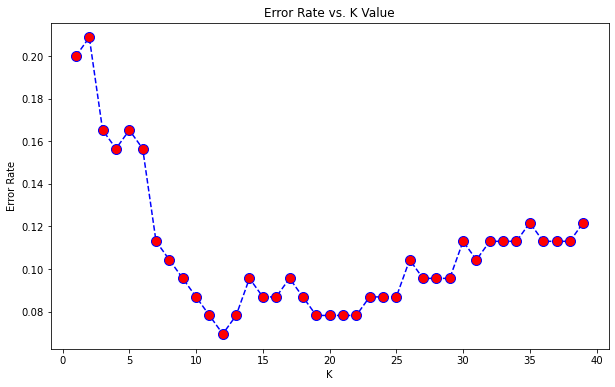

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('K-Value.jpg', dpi=None, facecolor='w', edgecolor='w',
          orientation='landscape', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None, metadata=None)

We can see that the error amount considered low around k amount of 10, we will take the value of k as 10

In [73]:
knn_model = Pipeline([('bow',CountVectorizer(analyzer=text_process1)),
                       ('tfidf',TfidfTransformer()),
                       ('classifier', KNeighborsClassifier(n_neighbors=10))])

In [74]:
knn_model.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process1 at 0x000001C4E97681F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=10))])

In [75]:
knn_pred = knn_model.predict(X_test)

In [76]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

        ZP 1       0.93      0.97      0.95        29
        ZP 2       0.89      0.89      0.89        28
        ZP 3       1.00      0.78      0.88         9
        ZP 4       0.89      0.92      0.91        26
        ZP 5       0.91      0.91      0.91        23

    accuracy                           0.91       115
   macro avg       0.93      0.89      0.91       115
weighted avg       0.91      0.91      0.91       115

